In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
import codecs

In [3]:
import logging

In [4]:
import multiprocessing

In [5]:
import os

In [6]:
import pprint

In [7]:
import re

In [8]:
import nltk

In [9]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /Users/Zhanik/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Zhanik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
import glob

# Show how book files look like

# What do we want to do?
## we want to analyze our text, but text, in general, is notoriously hard to work with. What we to do is to make vectors of words -> we want to have a mapping between words and vectors.

## Why not ids, why not from 0 -> 1?

## we can't see how close or far the words are, (its very linear)

#### Earth = (0, 0, 1)
#### Water = (0, 1, 0)
#### Fire = (1, 0, 0)

#### Dirt =(approx.) 1/2 Earth + 1/2 Water = (0, 0.5, 0.5)


In [12]:
books = sorted (glob.glob("./word_vectors_game_of_thrones-LIVE/data/*"))

In [13]:
books

['./word_vectors_game_of_thrones-LIVE/data/got1.txt',
 './word_vectors_game_of_thrones-LIVE/data/got2.txt',
 './word_vectors_game_of_thrones-LIVE/data/got3.txt',
 './word_vectors_game_of_thrones-LIVE/data/got4.txt',
 './word_vectors_game_of_thrones-LIVE/data/got5.txt']

In [14]:
corpus_raw = u""

In [15]:
for book in books:
    print("Reading '{0}'...".format(book))
    with codecs.open(book, "r", "utf-8") as book_file:
        corpus_raw += book_file.read()
    print("Corpus is now {0} characters long".format(len(corpus_raw)))
    print()
    

Reading './word_vectors_game_of_thrones-LIVE/data/got1.txt'...
Corpus is now 1770659 characters long

Reading './word_vectors_game_of_thrones-LIVE/data/got2.txt'...
Corpus is now 4071041 characters long

Reading './word_vectors_game_of_thrones-LIVE/data/got3.txt'...
Corpus is now 6391405 characters long

Reading './word_vectors_game_of_thrones-LIVE/data/got4.txt'...
Corpus is now 8107945 characters long

Reading './word_vectors_game_of_thrones-LIVE/data/got5.txt'...
Corpus is now 9719485 characters long



In [16]:
# Show how does the corpus raw file looks like
corcorpus_raw[1000:1100]

NameError: name 'corcorpus_raw' is not defined

In [17]:
tokenizer = nltk.data.load('/Users/Zhanik/nltk_data/tokenizers/punkt/english.pickle')

In [18]:
# Explain the tokenizer object

In [19]:
raw_sentences = tokenizer.tokenize(corpus_raw)

# The tokenizer splits the whole raw text according to tokens

In [20]:
raw_sentences[100:105]   #  We can see how raw sentences are a list of sentences now

[u'\u201cThis is early to come calling, scarce past dawn.',
 u'You should be snug in your bed.\u201d\n\n\u201cI had bad dreams,\u201d Shireen told him.',
 u'\u201cAbout the dragons.',
 u'They were coming to eat me.\u201d\n\nThe child had been plagued by nightmares as far back as Maester Cressen could recall.',
 u'\u201cWe have talked of this before,\u201d he said gently.']

In [21]:
def sentence_to_wordlist(raw):
    clean = re.sub("[^a-zA-Z]"," ", raw)
    words = clean.split()
    return words

### A general piece of advice here, if you do not know what a function does, you should try doing magic "?" command, I find it the most useful feature of Jupyter/IPython:
re?
np?
sentence_to_wordlist?
books?
nltk?

In [24]:
raw_sentences[45]

u'\u201cThe princess would see the white raven.\u201d Ever correct, Pylos called her princess now, as her lord father was a king.'

In [26]:
sentence_to_wordlist(raw_sentences[45])

[u'The',
 u'princess',
 u'would',
 u'see',
 u'the',
 u'white',
 u'raven',
 u'Ever',
 u'correct',
 u'Pylos',
 u'called',
 u'her',
 u'princess',
 u'now',
 u'as',
 u'her',
 u'lord',
 u'father',
 u'was',
 u'a',
 u'king']

#### u'Something' "u" stands for unicode, meaning that we are good!
#### Remember that our text isnt necessarily in English -> Unicode GOOD!

In [41]:
sentences = []
for raw_sentence in raw_sentences:
    if len(raw_sentence) > 0:
        sentences.append(sentence_to_wordlist(raw_sentence))

In [28]:
# Good way to make sure that everything is under control
# sentences = []

In [42]:
sentences?

### Count how many sentences do we have?

In [30]:
len(sentences)

0

In [31]:
len(sentences[0])

IndexError: list index out of range

In [32]:
sum( (len(sentences[1]), len(sentences[2]) ) )

IndexError: list index out of range

In [33]:
sum ( len(sentence) for sentence in sentences)

0

* Number of words pretty much *

In [34]:
# _i is also fun
print (_)  # nice way of getting the previous output

0


In [35]:
no_of_words = _

In [36]:
no_of_words

0

# So called data wrangling is done
Wikipedia
>Data wrangling (sometimes referred to as data munging) is the process of transforming and mapping data from one "raw" data form into another format with the intent of making it more appropriate and valuable for a variety of downstream purposes such as analytics.

So far we have only chew our data into a suitable format, no machine learning or anything fancy was involved


In [46]:
#step 2 build our model, another one is Glove
#define hyperparameters

# Dimensionality of the resulting word vectors.
#more dimensions mean more traiig them, but more generalized
num_features = 300


# vector (1, 2 ,3, 4, 6)
# "stark" = ( .4, ... , .05)
# "eddard" = ( .39, ..., .03)

# sum_over(i) [a_i * b_i] = 
# "dog" = (0, 0, 1)

# "galaxy" = (1, 0 ,0)
# "cat" = (.8, .2, 0)

# "dog" * "galaxy" = 0
# "dog" * "cat" = .8 <- this is value is always less 1.



#
# Minimum word count threshold.
min_word_count = 3 

# Number of threads to run in parallel.
num_workers = multiprocessing.cpu_count()

# Context window length.
# Number of words we look at a time
context_size = 7

# Downsample setting for frequent words.
# how often do we look at the same word
# Values between up to 1e-5 are fine

downsampling = 1e-3

# Seed for the RNG, to make the results reproducible.
seed = 1

In [47]:
import gensim.models.word2vec as w2v

In [48]:
thrones2vec = w2v.Word2Vec(
    sg=1,
    seed=seed,
    workers=num_workers,
    size=num_features,
    min_count=min_word_count,
    window=context_size,
    sample=downsampling
)

In [49]:
thrones2vec.build_vocab(sentences)

In [50]:
thrones2vec.vector_size

300

In [51]:
thrones2vec?

In [52]:
thrones2vec.train?

In [53]:
thrones2vec.train(sentences, total_examples=thrones2vec.corpus_count, epochs=thrones2vec.iter)

7021539

In [54]:
ls

Rehearsal.ipynb                    trained/
TSNEpickles/                       word_vectors_game_of_thrones-LIVE/
mydemo.ipynb


In [101]:
mkdir trained

In [102]:
thrones2vec.save("trained/trained_model")

In [55]:
brand_new_model = w2v.Word2Vec.load("trained/trained_model")

In [104]:
brand_new_model.vector_size

300

In [107]:
# Who Can answer THIS???

In [109]:
len(brand_new_model["Stark"])

300

In [110]:
brand_new_model.similarity("Stark", "Arya")

0.45936385541363006

In [111]:
brand_new_model.similarity("Stark", "Littlefinger")

0.36115063746301412

In [112]:
brand_new_model.similarity("Stark", "Dany")

0.071386766230689874

In [117]:
brand_new_model.similarity("Dany", "Unsullied")
brand_new_model.most_similar("Arya")

0.49128850994122569

In [118]:
brand_new_model.similarity("Stark", "Unsullied")

0.13037243690138989

# Time for some nice data representation


In [17]:
import sklearn.manifold
from sklearn.manifold import TSNE
#t-distributed Stochastic Neighbor Embedding.

In [10]:
brand_new_model = w2v.Word2Vec.load("trained/trained_model")

In [12]:
vocab = list(brand_new_model.wv.vocab)

In [ ]:
pprint (vocab)

In [14]:
X = brand_new_model[vocab]

In [18]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

In [21]:
import pandas as pd

In [33]:
df = pd.concat([pd.DataFrame(X_tsne),
                pd.DataFrame(vocab)],
               axis=1)

In [35]:
df.columns = ['x', 'y', 'word']

In [38]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

In [39]:
for i, txt in enumerate(df['word']):
    ax.annotate(txt, (df['x'].iloc[i], df['y'].iloc[i]))

In [42]:
import pickle

In [45]:
pickle.dump( X_tsne, open( "./TSNEpickles/save.p", "wb" ) )

In [46]:
X_tsne_new = pickle.load( open( "./TSNEpickles/save.p", "rb" ) )

In [47]:
X_tsne_new?

In [62]:
def plot_area(xarea, yarea):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.scatter(df['x'], df['y'])
    ax.set_xlim(xarea[0], xarea[1])
    ax.set_ylim(yarea[0], yarea[1])
    for i, txt in enumerate(df['word']):
        ax.annotate(txt, (df['x'].iloc[i], df['y'].iloc[i]))
    plt.show()

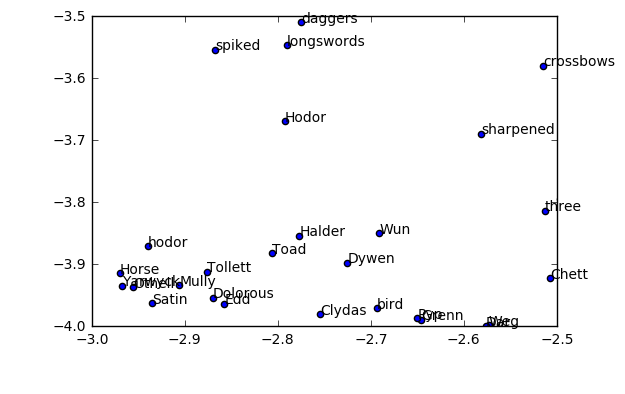

In [66]:
plot_area((-3,-2.5), (-4,-3.5))

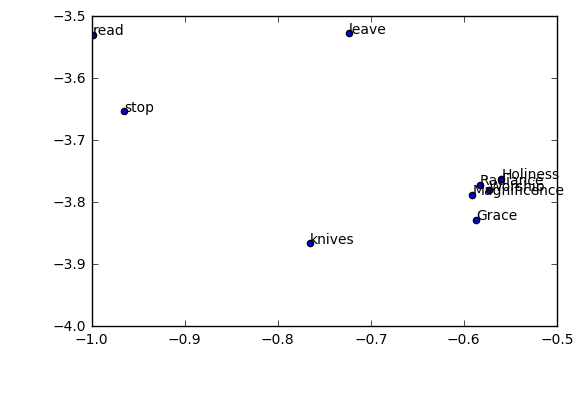

In [67]:
plot_area((-1,-0.5), (-4,-3.5))

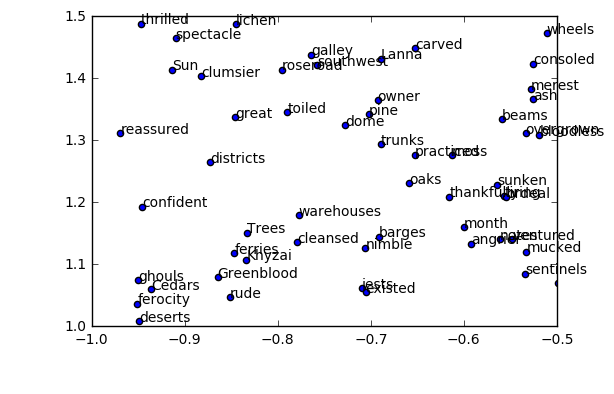

In [68]:
plot_area((-1,-0.5), (1,1.5))